<a href="https://colab.research.google.com/github/Coreight98/Paran_ajou_Project_Anything/blob/main/feature_cmp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import torch
import torchvision.models as models
import torch.nn as nn
GoogleNet = models.googlenet(pretrained=True)
GoogleNet.fc = nn.Linear(in_features=1024, out_features=35)
GoogleNet

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [17]:
from google.colab import drive
drive.mount('/content/drive')
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import PIL
import time
from sklearn.neighbors import KNeighborsClassifier
import random
import torch

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
train_location = '/content/drive/MyDrive/data/DTD_final/'

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

class PatternDataset():
    def __init__(self, image, mode, transforms):
        super().__init__()
        self.image = image
        self.mode = mode
        self.transforms = transforms

    def __getitem__(self, index):
        image_name = self.image[index]
        image = Image.open(train_location + image_name)
        image = image.resize((224,224))
        #Î†àÏù¥Î∏î ÏûÖÎ†•
        label = 1
        label = torch.tensor(label,dtype=torch.long)
        #Ïù¥ÎØ∏ÏßÄ Î≥ÄÌòï Ï†ÅÏö©Ïö©
        image = self.transforms(image)
        return image, label

    def __len__(self):
        return len(self.image)
    def ind(index):
      image=self.image[index]
      return image


In [21]:
if __name__ == '__main__':
    device ='cuda'
    if device == 'cuda':
      torch.cuda.manual_seed_all(777)
    SEED = 777
    seed_everything(SEED)
    #Îç∞Ïù¥ÌÑ∞ ÏÖã Î∂àÎü¨Ïò§Í≥† Ï†ïÍ∑úÌôî
    transform = transforms.Compose(
        [transforms.ToTensor(),
          transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
          ]
    )
    train_images = os.listdir(train_location)
    print(train_images)
    net=GoogleNet
    PATH = '/content/drive/MyDrive/data/DTD_save/GoogleNet_save.pth'
    net.load_state_dict(torch.load(PATH))

    net.eval()
    X = np.load('/content/drive/MyDrive/data/DTD_save/DTD_features.npy')
    X = np.reshape(X,(3624,35))
    Y = np.zeros((3624,1))
    Y = np.reshape(Y,(3624,1))
    reg = KNeighborsClassifier(n_neighbors=4)
    reg.fit(X,Y)
    
    input_pth = '/content/drive/MyDrive/data/DTD_final/braided_0078.jpg'
    img = PIL.Image.open(input_pth) ##################Ïó¨Í∏∞Í∞Ä input imageÏûÖÎãàÎã§Ïöî
    img = img.resize((224,224))
    emp = torch.empty((1,3,224,224),dtype=torch.float32)
    img_t =transform(img)
    emp[0] = img_t
    input = net(emp)
    neighbor_index= reg.kneighbors(input.detach().numpy(),n_neighbors=4,return_distance=False)
    neighbor_index.sort()
    

['interlaced_0057.jpg', 'zigzagged_0066.jpg', 'interlaced_0093.jpg', 'zigzagged_0119.jpg', 'stratified_0118.jpg', 'zigzagged_0102.jpg', 'zigzagged_0092.jpg', 'interlaced_0180.jpg', 'interlaced_0179.jpg', 'interlaced_0112.jpg', 'zigzagged_0078.jpg', 'zigzagged_0023.jpg', 'stratified_0073.jpg', 'stratified_0128.jpg', 'stratified_0094.jpg', 'stratified_0074.jpg', 'interlaced_0121.jpg', 'stratified_0120.jpg', 'interlaced_0099.jpg', 'stratified_0064.jpg', 'interlaced_0143.jpg', 'stratified_0146.jpg', 'interlaced_0150.jpg', 'interlaced_0162.jpg', 'zigzagged_0083.jpg', 'stratified_0109.jpg', 'zigzagged_0113.jpg', 'interlaced_0128.jpg', 'zigzagged_0096.jpg', 'interlaced_0119.jpg', 'stratified_0083.jpg', 'stratified_0106.jpg', 'stratified_0067.jpg', 'interlaced_0190.jpg', 'stratified_0155.jpg', 'stratified_0160.jpg', 'interlaced_0187.jpg', 'interlaced_0169.jpg', 'stratified_0133.jpg', 'stratified_0132.jpg', 'stratified_0047.jpg', 'interlaced_0163.jpg', 'stratified_0099.jpg', 'stratified_0103.jp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


braided_0121.jpg


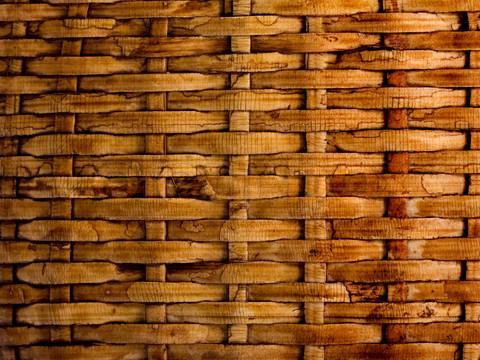

bumpy_0079.jpg


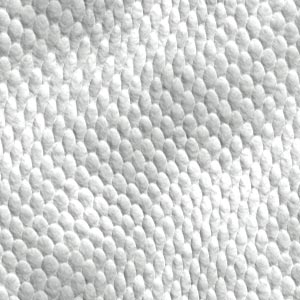

braided_0174.jpg


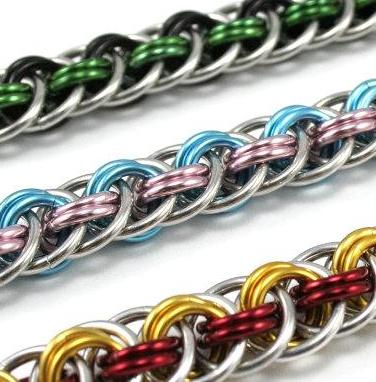

braided_0081.jpg


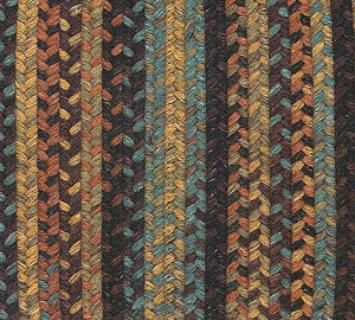

In [22]:
##### ÏïÑÏõÉÌíã Ïù¥ÎØ∏ÏßÄ 4Ïû• Ï∂úÎ†• #####
from IPython.display import Image 
for ind in neighbor_index[0]:
  print(train_images[ind])
  name='/content/drive/MyDrive/data/DTD_final/%s'%(train_images[ind])
  img=Image(name)
  display(img)
from PIL import Image

In [7]:
%cd /content/
!git clone https://github.com/ultralytics/yolov5.git

%cd /content/yolov5/
!pip install -r requirements.txt

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 6359, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 6359 (delta 41), reused 42 (delta 17), pack-reused 6281
Receiving objects: 100% (6359/6359), 8.58 MiB | 26.80 MiB/s, done.
Resolving deltas: 100% (4343/4343), done.
/content/yolov5
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 645kB 12.7MB/s 
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [23]:
from glob import glob
furniture = {'ÏÇ¨Î¨¥Ïö©ÏùòÏûê', 'Í∞ÄÏ£ΩÏïîÏ≤¥Ïñ¥', 'ÎîîÎ∞òÏπ®ÎåÄ', 'Ïò∑Ïû•', 'ÌôîÏû•ÎåÄ', 'Î∞îÌÖåÏù¥Î∏î', 'Ïú†ÏïÑÏö©Ïπ®ÎåÄ', 'ÏÉ§ÏõåÏª§Ìäº', 'Ïñ¥Î¶∞Ïù¥ÏùòÏûê', 'ÏàòÎÇ©Í∞ÄÍµ¨', 'Ìå®Î∏åÎ¶≠ÏïîÏ≤¥Ïñ¥',
             'Í∞ÄÏ£ΩÏÜåÌåå', 'Ïä§Ìà¥/Î≤§Ïπò', 'ÌíãÏä§Ìà¥/Ïø†ÏÖòÌòïÏä§Ìà¥', 'Ï±ÖÏÉÅ/Ïª¥Ìì®ÌÑ∞Ï±ÖÏÉÅ', 'Ïª§ÌîºÌÖåÏù¥Î∏î/Î≥¥Ï°∞ÌÖåÏù¥Î∏î', 'ÏòÅÏïÑÏö©ÏùòÏûê', 'ÏãùÌÉÅÏùòÏûê', 'Ïª§Ìäº', 'Î∞îÏùòÏûê', 'ÏÜåÌååÎ≤†Îìú',
             'ÎçîÎ∏î/ÌÄ∏/ÌÇπÏπ®ÎåÄ', 'Î¶¨ÌÅ¥ÎùºÏù¥ÎÑà', 'Î°úÌîÑÌä∏/2Ï∏µÏπ®ÎåÄ', 'ÎùºÌÉÑÏïîÏ≤¥Ïñ¥', 'Ìå®Î∏åÎ¶≠ÏÜåÌåå', 'Ïã±Í∏Ä/ÏàòÌçºÏã±Í∏Ä+Ïπ®ÎåÄ', 'ÏãùÌÉÅ', 'Î∏îÎùºÏù∏Îìú', 'Ïñ¥Î¶∞Ïù¥Ïπ®ÎåÄ', 'Ïπ¥ÌéòÏùòÏûê', 'Ïñ¥Î¶∞Ïù¥Ïò∑Ïû•', 'Ïñ¥Î¶∞Ïù¥ÌÖåÏù¥Î∏î'}

val_imgg_list = glob('/content/drive/MyDrive/·Ñë·Ö°·ÑÖ·Ö°·Ü´·Ñí·Ö°·Ü®·ÑÄ·Öµ/·ÑÄ·Ö°·ÑÄ·ÖÆ ·Ñã·Öµ·ÑÜ·Öµ·Ñå·Öµ_·Ñé·Ö¨·Ñå·Ö©·Üº/images/ÎùºÌÉÑÏïîÏ≤¥Ïñ¥/*.jpg')

val_img_path = val_imgg_list[0:10]
print(len(val_imgg_list))
weights_path = '/content/drive/MyDrive/data/DTD_save/best.pt'
for item in val_img_path:
  !python detect.py --weights "{weights_path}" --img 416 --conf 0.3 --source "{item}" --save-txt 

101
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.3, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=416, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=True, source='/content/drive/MyDrive/·Ñë·Ö°·ÑÖ·Ö°·Ü´·Ñí·Ö°·Ü®·ÑÄ·Öµ/·ÑÄ·Ö°·ÑÄ·ÖÆ ·Ñã·Öµ·ÑÜ·Öµ·Ñå·Öµ_·Ñé·Ö¨·Ñå·Ö©·Üº/images/ÎùºÌÉÑÏïîÏ≤¥Ïñ¥/·ÑÖ·Ö°·Ñê·Ö°·Ü´·Ñã·Ö°·Ü∑·Ñé·Ö¶·Ñã·Ö•_1.jpg', update=False, view_img=False, weights=['/content/drive/MyDrive/data/DTD_save/best.pt'])
YOLOv5 üöÄ v5.0-108-g19100ba torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7067395 parameters, 0 gradients, 16.4 GFLOPS
image 1/1 /content/drive/MyDrive/·Ñë·Ö°·ÑÖ·Ö°·Ü´·Ñí·Ö°·Ü®·ÑÄ·Öµ/·ÑÄ·Ö°·ÑÄ·ÖÆ ·Ñã·Öµ·ÑÜ·Öµ·Ñå·Öµ_·Ñé·Ö¨·Ñå·Ö©·Üº/images/ÎùºÌÉÑÏïîÏ≤¥Ïñ¥/·ÑÖ·Ö°·Ñê·Ö°·Ü´·Ñã·Ö°·Ü∑·Ñé·Ö¶·Ñã·Ö•_1.jpg: 416x416 1 chair, Done. (0.009s)
Results saved to runs/detect/exp11
1 labels saved to

############## 1
# 1
11 17 577 574


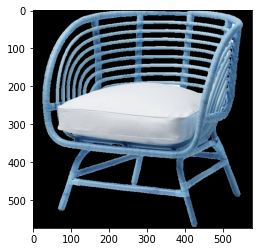

############## 2
# 1
67 6 477 586


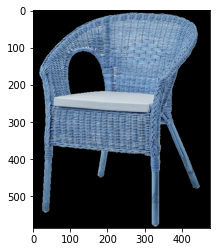

############## 3
# 1
73 9 456 583


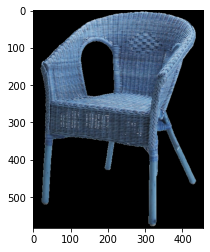

############## 4
# 1
180 210 262 313


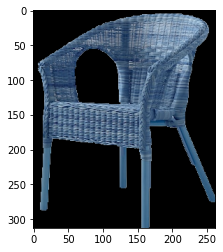

############## 5
# 1
14 13 555 567


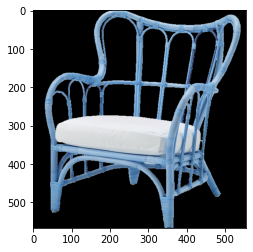

############## 6
# 1
3 12 583 574


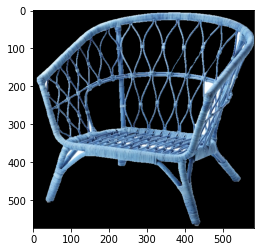

############## 7
# 1
9 12 577 580


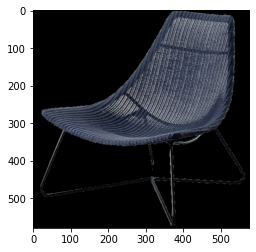

############## 8
# 1
72 109 439 387


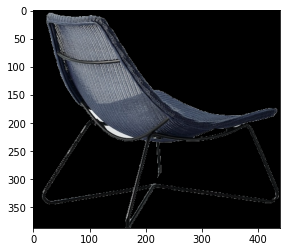

############## 9
# 1
14 11 573 586


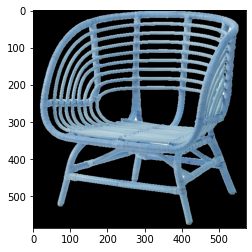

############## 10
# 1
7 9 576 580


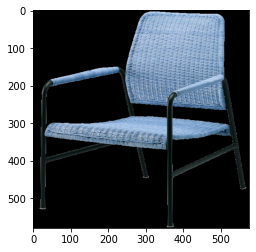

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import glob

output = []

for i in range(1,len(val_img_path)+1):
  print("##############",i)
  if i == 1 :
    path = '/content/yolov5/runs/detect/exp/labels/*'
    file_list = glob.glob(path)
  else:
    path = '/content/yolov5/runs/detect/exp%d/labels/*'%i
    file_list = glob.glob(path)
  try:
    path = file_list[0]
    f = open(path, 'r')
    lines = f.readlines()
    if len(lines)>=2:
      print('more than 2')
      continue
  except:
    print('detection failed.')
    continue
  src = cv2.imread(val_img_path[i-1], cv2.IMREAD_COLOR)
  k=1
  for line in lines:
      print("#",k)
      
      token = line.split(' ')
      x=float(token[1])
      y=float(token[2])
      w=float(token[3])
      h=float(token[4])

      x1=x-w/2
      y1=y-h/2
      

      x1_pixel = int(x1*src.shape[1])
      w_pixel = int(w*src.shape[1])
      y1_pixel = int(y1*src.shape[0])
      h_pixel = int(h*src.shape[0])
      
      print(x1_pixel,y1_pixel,w_pixel,h_pixel)
      rectangle = (x1_pixel,y1_pixel,w_pixel,h_pixel)
      # Ï¥àÍ∏∞ ÎßàÏä§ÌÅ¨ ÏÉùÏÑ±
      mask = np.zeros(src.shape[:2], np.uint8)

      #   grabCutÏóê ÏÇ¨Ïö©Ìï† ÏûÑÏãú Î∞∞Ïó¥ ÏÉùÏÑ±
      bgdModel = np.zeros((1, 65), np.float64)
      fgdModel = np.zeros((1, 65), np.float64)

      # grabCut Ïã§Ìñâ
      cv2.grabCut(src, # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ
            mask,       # ÎßàÏä§ÌÅ¨
            rectangle,  # ÏÇ¨Í∞ÅÌòï
            bgdModel,   # Î∞∞Í≤ΩÏùÑ ÏúÑÌïú ÏûÑÏãú Î∞∞Ïó¥
            fgdModel,   # Ï†ÑÍ≤ΩÏùÑ ÏúÑÌïú ÏûÑÏãú Î∞∞Ïó¥
            5,          # Î∞òÎ≥µ ÌöüÏàò
            cv2.GC_INIT_WITH_RECT) # ÏÇ¨Í∞ÅÌòïÏùÑ ÏúÑÌïú Ï¥àÍ∏∞Ìôî

      #Î∞∞Í≤ΩÏù∏ Í≥≥ÏùÄ 0, Í∑∏ Ïô∏ÏóêÎäî 1Î°ú ÏÑ§Ï†ïÌïú ÎßàÏä§ÌÅ¨ ÏÉùÏÑ±
      mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

      # Ïù¥ÎØ∏ÏßÄÏóê ÏÉàÎ°úÏö¥ ÎßàÏä§ÌÅ¨Î•º Í≥±Ìñâ Î∞∞Í≤ΩÏùÑ Ï†úÏô∏
      image_rgb_nobg = src * mask_2[:, :, np.newaxis]
      A = image_rgb_nobg[y1_pixel:(y1_pixel+h_pixel),x1_pixel:(x1_pixel+w_pixel)]
      output.append([A,i])
      # plot
      plt.imshow(output[i-1][0])
      plt.show()
  f.close()

1 processing
96
82
99
114


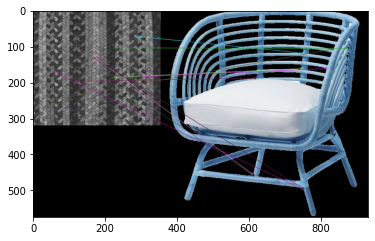

2 processing
121


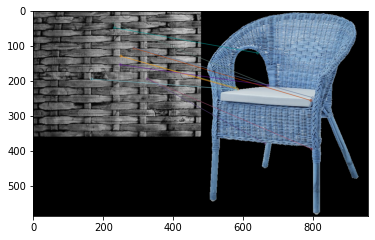

3 processing
97
104
120


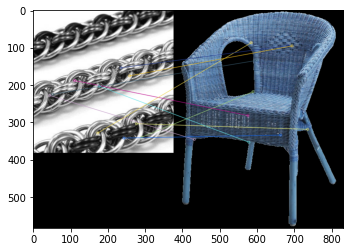

4 processing
112


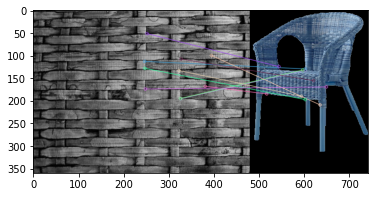

5 processing
116


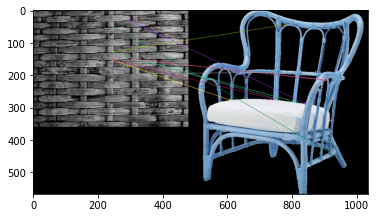

6 processing
106
93
118


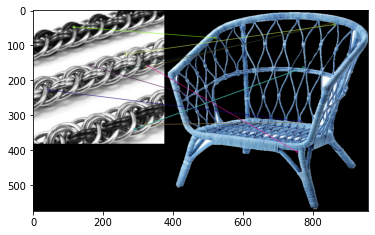

7 processing
123


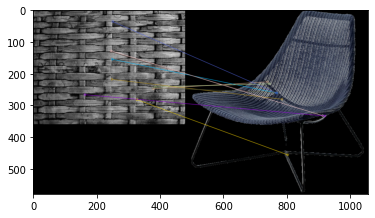

8 processing
92
66
98
87
9 processing
109
81
95
106
10 processing
124


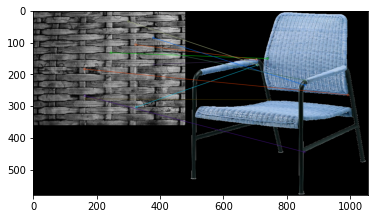

[1, 2, 3, 4, 5, 6, 7, 10]


In [45]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
ans_arr = []
for i in range(len(output)):
  print(i+1,"processing")
  for j in range(4):
    name='/content/drive/MyDrive/data/DTD_final/%s'%(train_images[neighbor_index[0][j]])
    img1 = cv2.imread(name,0)
    img2 = output[i][0]
    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(img1,None)
    kp2, des2 = orb.detectAndCompute(img2,None)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1,des2)
    matches = sorted(matches, key = lambda x:x.distance)
    print(len(matches))
    if len(matches) > 110:
      ans_arr.append(output[i][1])
      img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=2)
      plt.imshow(img3),plt.show()
      break
    

print(ans_arr)

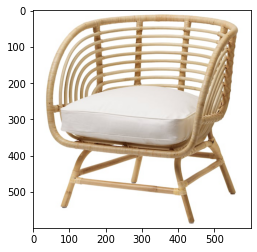

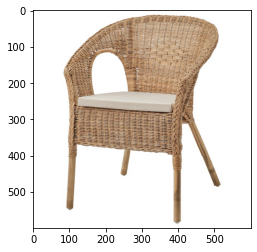

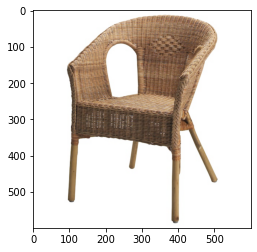

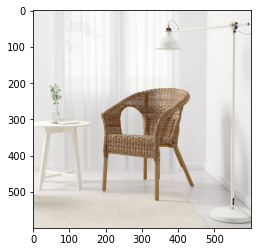

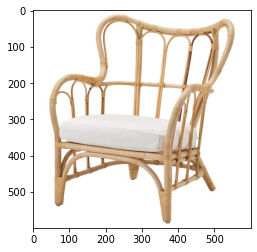

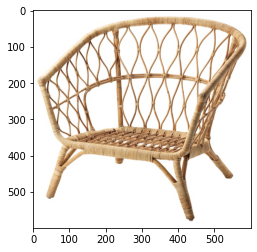

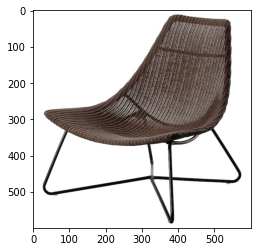

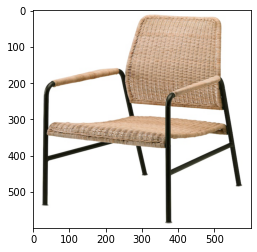

In [48]:
import matplotlib.image as img 
import matplotlib.pyplot as pp 

for i in ans_arr:
  ndarray = img.imread(val_imgg_list[i-1]) 
  pp.imshow(ndarray) 
  pp.show()

